<img src='Image/CBG18.png' width="220px" align="right"> <img src='Image/uff-logo.png' width="200px" align="left"> <img src='Image/logon.jpg' width="200px" align="center"> 

### <center size=2> Real data example : Paraná Basin, Brazil <center> 
    

--------------------------------------------------------------------------------------------------------------------

In [1]:
#----------------------------- INTERNAL PACKAGES --------------------------- #
import numpy as np
import numpy.ma as ma
import ipywidgets as widgets
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Latex
from scipy import stats
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from scipy.interpolate import griddata
from pandas import Series, DataFrame
from mpl_toolkits.mplot3d import axes3d
import pylab as py
#________________________________________________________________________________#

# Geologia Regional e Contexto Geotectônico da Área de Estudo

> A Bacia do Paraná desenvolveu-se sobre uma área de escudo do continente Gondwana Sul e é composta por uma série de núcleos cratônicos, rodeados por vários cinturões móveis e cobertos por bacias molássicas, que foram desenvolvidas durante o ciclo termo-tectônico Brasiliano que se estendeu desde o neoproterozóico até o Ordoviciano. A deformação decorrente deste ciclo teve início entre 700 Ma e 650 Ma, sendo que a maior parte das intrusões de granitos que podemos observar na Bacia, situou-se dentro do limite entre o Proterozóico e o Paleozóico (cerca de 570 Ma) com resfriamento durante o Cambro-Ordoviciano entre 500-450 Ma (Zalan, 1987; Hawkesworth,2000).
>
> O embasamento que circunda a Bacia do Paraná é dividido em: margem Leste/Sudeste, representado pelas faixas Dom Feliciano e Ribeira ,de idade Brasiliana e de direção NE-SW, separados por um núcleo cratônico designado Rio de La Plata/ Luiz Alves; margem Norte/Nordeste, representada pela faixa Uruaçu, de idade mesoproterozóica, de direção NW e por dois maciços arqueanos (Guaxupé e Goiás) remobilizados durante o ciclo Brasiliano; margem Oeste/Noroeste representada pela faixa de dobramentos Paraguai/Araguaia, também do ciclo Brasiliano, que delimita o extremo da borda Noroeste da Bacia (Hawkesworth, 2000; Borghi, 2002) .
>
> Dentre os principais grupos de estruturas, nota-se três grupos de lineamentos de direções preferenciais NW-SE, E-W e NE-SW, representando cada um evento termo-tectônico distinto. O conjunto de lineamentos NW-SE são os mais antigos e estão relacionados ao evento  termo-tectônico do Transamazônico, e, as zonas de falhas geológicas associadas a este evento foram reativadas durante o rifteamento do Atlântico Sul, no Cretáceo.  Os lineamentos E-W, tiveram início a partir do Triássico e são paralelos às zonas de fratura oceânica, sugerindo uma ligação com o desenvolvimento do Atlântico Sul. Os lineamentos NE-SW são derivados do evento tremo-tectônico Brasiliano e de seus cinturões móveis associados. Este último conjunto de lineamentos é isento de diques de basalto (Milani, 1999). 
>
> O registro estratigráfico da Bacia do Paraná é formado por pacote sedimentar e magmático de espessura máxima em torno de 7000 m, que coincide geograficamente com o depocentro estrutural da sinéclise e com a calha do rio paraná (Milani,1998). O registro estratigráfico da Bacia do Paraná é dividido em seis unidades de ampla escala ou supersequências (Vail, 1977) na forma de pacotes rochosos com intervalos temporais de algumas dezenas de milhões de anos de duração e envelopados por superfícies de discordância de caráter inter-regional: Rio Ivaí (Ordoviciano-Siluriano), Paraná (Devoniano), Gondwana I (Carbonífero-Eotriássico), Gondwana II (Meso a Neotriássico), Gondwana III (Neojurássico-Eocretáceo) e Bauru (Neocretáceo). As três primeiras supersequências são representadas por sucessões sedimentares que definem ciclos transgressivos e regressivos ligados às oscilações do nível relativo do mar, durante o Paleozóico, ao passo que as demais correspondem a pacotes de sedimentos continentais com rochas ígneas associadas. As unidades formais da litoestratigrafia, quais sejam os grupos, formações e membros comumente utilizados na descrição do arranjo espacial dos estratos da bacia, inserem-se como elementos particularizados neste arcabouço aloestratigráfico de escala regional (boletim_2007).
>
> O mapa geológico-estrutural abaixo apresenta as formações aflorantes bem como as principais lineamentos e o Arco de Ponta Grossa e a localização da área de estudo.

  <img src='Image/Figure1revision.png' width="750px" align="center">

# Typical rock densities for Paraná Sedimentary Basin (Geology information)


|       Formações Geológicas       |Densidades(g/cm³)| Ciclos de Deposição |
|----------------------------------|-----------------|---------------------|
|Serra Geral                       |      2.80       |     Gondwana III    |
|Botucatu                          |      2.33       |     Gondwana III    | 
|Pirambóia                         |      2.47       |      Gondwana I     | 
|Rio do Rasto                      |      2.40       |      Gondwana I     |
|Teresina                          |      2.50       |      Gondwana I     |
|Irati                             |      2.60       |      Gondwana I     |
|Palermo                           |      2.55       |      Gondwana I     |
|Rio Bonito                        |      2.57       |      Gondwana I     |
|Taciba (Mb. Chapeo do Sol)        |      2.63       |      Gondwana I     |
|Campo Mourão                      |      2.60       |      Gondwana I     |
|Lagoa Azul (Mb. Taquaral)         |      2.63       |      Gondwana I     |
|Lagoa Azul (Mb. Cuiaba Paulista)  |      2.57       |      Gondwana I     |
|Ponta Grossa                      |      2.60       |        Paraná       |
|Furnas                            |      2.20       |        Paraná       |
|Vila Maria                        |      2.23       |       Rio Ivaí      |
|Embasamento                       |      2.75       |    Pré-Cambriano    |


# <center> Start coding from here on ! <center>

In [2]:
# Use pandas to read the real data:
data = pd.read_table('Real/Grav.csv', sep=',' )
print(data)

               Lat       Long      mGal
0       -23.737157 -53.401241  8.508879
1       -23.737165 -53.401241  8.508970
2       -23.737172 -53.401241  8.509061
3       -23.737179 -53.401241  8.509153
4       -23.737186 -53.401241  8.509244
5       -23.737194 -53.401241  8.509335
6       -23.737201 -53.401241  8.509426
7       -23.737208 -53.401241  8.509517
8       -23.737215 -53.401241  8.509608
9       -23.737222 -53.401241  8.509699
10      -23.737230 -53.401241  8.509790
11      -23.737237 -53.401241  8.509882
12      -23.737244 -53.401241  8.509973
13      -23.737251 -53.401241  8.510064
14      -23.737259 -53.401241  8.510155
15      -23.737266 -53.401241  8.510246
16      -23.737273 -53.401241  8.510337
17      -23.737280 -53.401241  8.510428
18      -23.737287 -53.401241  8.510520
19      -23.737295 -53.401241  8.510611
20      -23.737302 -53.401241  8.510702
21      -23.737309 -53.401241  8.510793
22      -23.737316 -53.401241  8.510884
23      -23.737324 -53.401241  8.510975


#  <center size=3> Some useful tools of pandas: <center>

In [3]:
# sum all data per column:
#data.sum()["Lat"]
data.sum()

Lat     -2.377206e+07
 Long   -5.562959e+07
 mGal    1.461482e+06
dtype: float64

In [4]:
# get the min value per column:
data.min()

Lat     -24.259810
 Long   -54.343458
 mGal   -18.536044
dtype: float64

In [5]:
# get the max value per column:
data.max()

Lat     -21.025533
 Long   -51.744631
 mGal    16.177325
dtype: float64

#  <center size=3> Plot the spacial distribution of the real data set: <center>

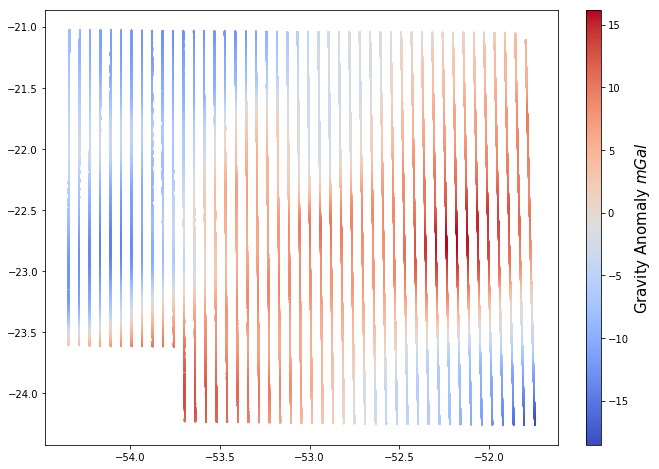

In [6]:
# ------------ plot the flight lines to check for the interpolation:--------#
# ------------ set figure size: ------------------------------------------#
plt.close('all')
py.rcParams['figure.figsize'] = (10.0, 8.0) 
fig = plt.figure()
p = plt.scatter(data[' Long'], data['Lat'], s=1.0, c=data[' mGal'], marker='.', cmap=plt.cm.coolwarm)
cbar = plt.colorbar(p, aspect=30, fraction = 0.03, orientation="vertical")
cbar.set_label('Gravity Anomaly $ mGal $',fontsize=15, rotation = 90)
plt.show()

# <center size=3>  Create a mesh to plot the real data flight: <center> 

In [7]:
# set the mesh spacial boundaries from real data by means of pandas commands:
#latmin = data.min()['Lat']
latmin = data.min()[0]
print 'min latitude = ', latmin
#lonmin = data.min()[' Long']
lonmin = data.min()[1]
print 'min longitude =', lonmin
#latmax = data.max()["Lat"]
latmax = data.max()[0]
print 'max latitude =', latmax
#lonmax = data.max()[" Long"]
lonmax = data.max()[1]
print 'max longitude =', lonmax

# define the number of data in both latitude and longitude directions: 
nlat = 200  # 825 - numer of lines collected from factoration of total number of data flight.
nlon = 200  # 1271

# create a linspace for longitudes:
x = np.linspace(lonmin, lonmax, nlon)
# and for latitudes:
y = np.linspace(latmin, latmax, nlat)
# mesh for interpolation:
LON,LAT = np.meshgrid(x,y)

min latitude =  -24.259809557806697
min longitude = -54.343457667574604
max latitude = -21.0255330028869
max longitude = -51.7446306178909


# <center size=3>   Interpolation of flight data: <center> 

In [8]:
# convert lists to mnemonic arrays to perform calculations:
#lat = (data.iloc[:,0]) # latitude
#lon = (data.iloc[:,1]) # longitude
#gz =  (data.iloc[:,2]) # gz

# Columns names as identificators:
lat = ( data["Lat"] ) # latitude
lon = ( data[" Long"] ) # longitude
gz =  ( data[" mGal"]) # gz
#print lon, lat, gz

In [9]:
flight_obs = (lon,lat) # real observation positions
grid_obs = (LON,LAT) # interpolated observation positions

# function of scipy for interpolation:
gzi = griddata(flight_obs, gz, grid_obs , method='cubic')

# <center size=3> Plot of the interpolated data for verification: <center>

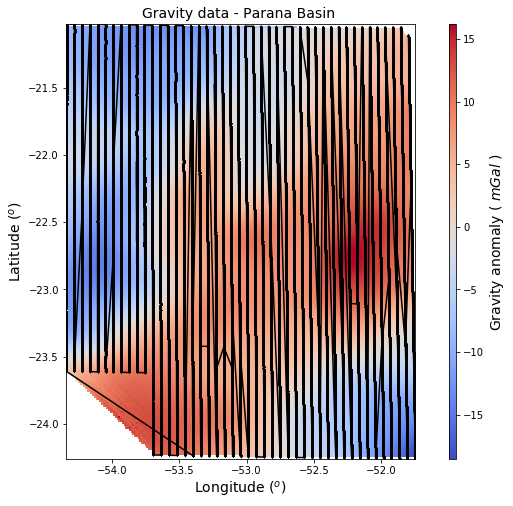

In [10]:
# ------------ set figure size: ------------------------------------------#
plt.close('all')
py.rcParams['figure.figsize'] = (12.0, 8.0) 
fig = plt.figure()
fs = 14 # fontsize

# ------------ plot the interpolated gravity anomaly in contourmap: -------#
plt.title('Gravity data - Parana Basin ', fontsize = fs)
image = plt.imshow(gzi, cmap=plt.cm.coolwarm,interpolation="none",
                origin='lower',extent=[lonmin, lonmax, latmin, latmax])

# ------------ plot the flight lines to check for the interpolation:--------#
plt.plot(lon, lat, color='black', marker='.', markersize=0.5)

# colobar specifications:
cbar = fig.colorbar(image, aspect=60, fraction = 0.1, orientation="vertical")
cbar.set_label('Gravity anomaly ( $ mGal$ )',fontsize=fs, rotation = 90)
plt.xlabel('Longitude ($^o$)', fontsize = fs)
plt.ylabel('Latitude ($^o$)', fontsize = fs)
plt.show()

In [11]:
# ------------- copy the interpolated data into another array for convenience: -------------#
gzgrid = np.copy(gzi)
gzgrid = np.asarray(gzgrid)
nx, ny = np.shape(gzgrid)
print 'number of gridded points in longitude =', nx
print 'number of gridded points in latitude = ', ny

number of gridded points in longitude = 200
number of gridded points in latitude =  200


In [12]:
# ------------- Define the region where there is no flight lines (ONLY WORK FOR CORNES!): -----------------#
i = np.where(x <= -53.6) #and np.where(x>= -52.5)
j = np.where(y <= -23.5) #and np.where(y>= -22.5)
I,J = np.meshgrid(i,j)

# define nans for undesired regions: 
gzgrid[J,I] = np.nan       

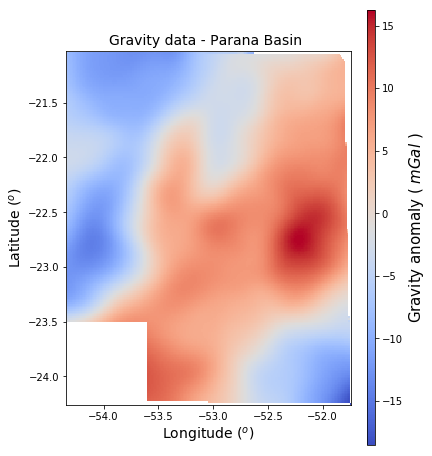

In [13]:
# ------------ set figure size: ------------------------------------------#
plt.close('all')
py.rcParams['figure.figsize'] = (6.0, 8.0) 
fig = plt.figure()
fs = 14 # fontsize!!!!

# ------------ plot the interpolated gravity anomaly in contourmap: -------#
plt.title('Gravity data - Parana Basin ', fontsize = fs)
#p = plt.pcolormesh(LON, LAT, gzgrid, vmin= gz.min(), vmax = gz.max() )
p = plt.imshow(gzgrid, cmap=plt.cm.coolwarm,interpolation="none",
                origin='lower',extent=[lonmin, lonmax, latmin, latmax])

# color bar specifications:
cbar = fig.colorbar(p, aspect=60, fraction = 0.1, orientation="vertical")
cbar.set_label('Gravity anomaly ( $ mGal$ )',fontsize=15, rotation = 90)
plt.xlabel('Longitude ($^o$)', fontsize = fs)
plt.ylabel('Latitude ($^o$)', fontsize = fs)       
plt.show()

# Delimiting a study region using Pandas commands:

In [14]:
# longitude filter:
target = data.loc[ (data[' Long']<= -52.2) & (data[' Long']>= -52.5) ] # should have the whitespace " LONG" !
# latitude filter:
target = target.loc[ (target['Lat' ]<= -22.3) & (target['Lat']>= -23.3) ]
# check if is right:
target.max(), target.min()

(Lat     -22.300016
  Long   -52.231057
  mGal    16.177325
 dtype: float64, Lat     -23.299956
  Long   -52.476738
  mGal     4.955169
 dtype: float64)

In [15]:
# INterpolate the desired data 
# set the mesh limits from real data with pandas command presented above:
#latmin = data.min()['Lat']
lat1 = target.min()[0]
print 'min target latitude = ', lat1
#lonmin = data.min()[' Long']
lon1 = target.min()[1]
print 'min target longitude =', lon1
#latmax = data.max()["Lat"]
lat2 = target.max()[0]
print 'max target latitude =', lat2
#lonmax = data.max()[" Long"]
lon2 = target.max()[1]
print 'max target longitude =', lon2

# create a linspace for filtered longitudes:
targ_lon = np.linspace(lon1, lon2, 200, endpoint=True)
# and for filtered latitudes:
targ_lat = np.linspace(lat1, lat2, 200, endpoint=True)
# mesh for interpolation:
targ_LON, targ_LAT = np.meshgrid(targ_lon, targ_lat)

min target latitude =  -23.2999559777923
min target longitude = -52.4767380527452
max target latitude = -22.300015920843002
max target longitude = -52.2310571316459


# <center> Perform interpolation of the target area : <center>

In [16]:
# working arrays for more clear code:
w1 = (np.array( target[' Long'] ), np.array( target['Lat']) )  # real coordinates
w2 = (targ_LON, targ_LAT) # interpolated coordinates
w3 = np.array( target[' mGal'] ) # real gravity data
# function of scipy for interpolation:
targ_gzi = griddata( w1, w3 , w2, method='cubic')

In [17]:
print np.where(targ_gzi == np.nan)
print targ_gzi

(array([], dtype=int64), array([], dtype=int64))
[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ... 6.51795569 6.51545074        nan]
 [       nan        nan        nan ... 6.65830536 6.65610234        nan]
 ...
 [       nan 8.36540973 8.38182677 ...        nan        nan        nan]
 [       nan 8.35949077 8.37611854 ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]


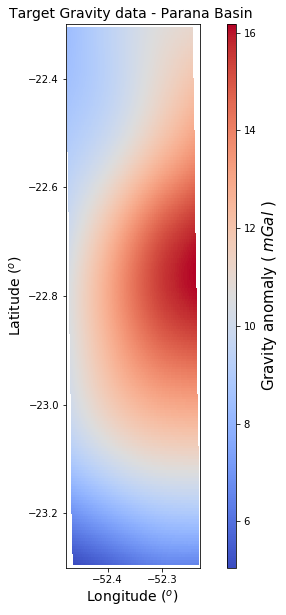

In [18]:
# ------------ set figure size: ------------------------------------------#
plt.close('all')
py.rcParams['figure.figsize'] = (10.0, 10.0) 
fig = plt.figure()
fs = 14 # fontsize!!!!

# ------------ plot the interpolated gravity anomaly in contourmap: -------#
plt.title('Target Gravity data - Parana Basin ', fontsize = fs)
#p = plt.pcolormesh(LON, LAT, gzgrid, vmin= gz.min(), vmax = gz.max() )
p = plt.imshow(targ_gzi, cmap=plt.cm.coolwarm,interpolation="none",
                origin='lower', extent=[lon1, lon2, lat1, lat2])

# color bar specifications:
cbar = fig.colorbar(p, aspect=60, fraction = 0.1, orientation="vertical")
cbar.set_label('Gravity anomaly ( $ mGal$ )',fontsize=15, rotation = 90)
plt.xlabel('Longitude ($^o$)', fontsize = fs)
plt.ylabel('Latitude ($^o$)', fontsize = fs)       
plt.show()


##  <center> Let's plot the maps into more realistic Cartographic projections?? <center> 

## <center> Define the coordinates of the projection <center>

In [19]:
lon0 = 0.5*(lonmin + lonmax)
lat0 = 0.5*(latmin + latmax)

# ------- use basemap function to create the plot : ---------# 
m = Basemap(llcrnrlon=lonmin,llcrnrlat=latmin,
            urcrnrlon=lonmax,urcrnrlat=latmax, 
            resolution='l',projection='poly', 
            lon_0=lon0, lat_0=lat0)

In [20]:
# convert lat lon coordinates into utm:
utmx, utmy = m(LON, lat)
print utmx

RuntimeError: 

# Null space

# Proposed model for the region